In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('summary.csv')

In [6]:
baseline = df.iloc[0]
print(baseline)

status                               ok
unroll                                1
resource                   RAM_T2P_BRAM
bench          port-and-unroll:gemm-0-0
bram_used                            44
dsp_used                              3
lut_used                           1539
lutmem_used                         137
reg_used                           2642
uram_used                             0
runtime_avg                     10.4019
runtime_std                   0.0121939
Name: 0, dtype: object


In [7]:
keys = [
    'lut_used',
    'lutmem_used',
    'bram_used',
    'reg_used',
    'dsp_used',
    'runtime_avg',
]

<Figure size 432x288 with 0 Axes>

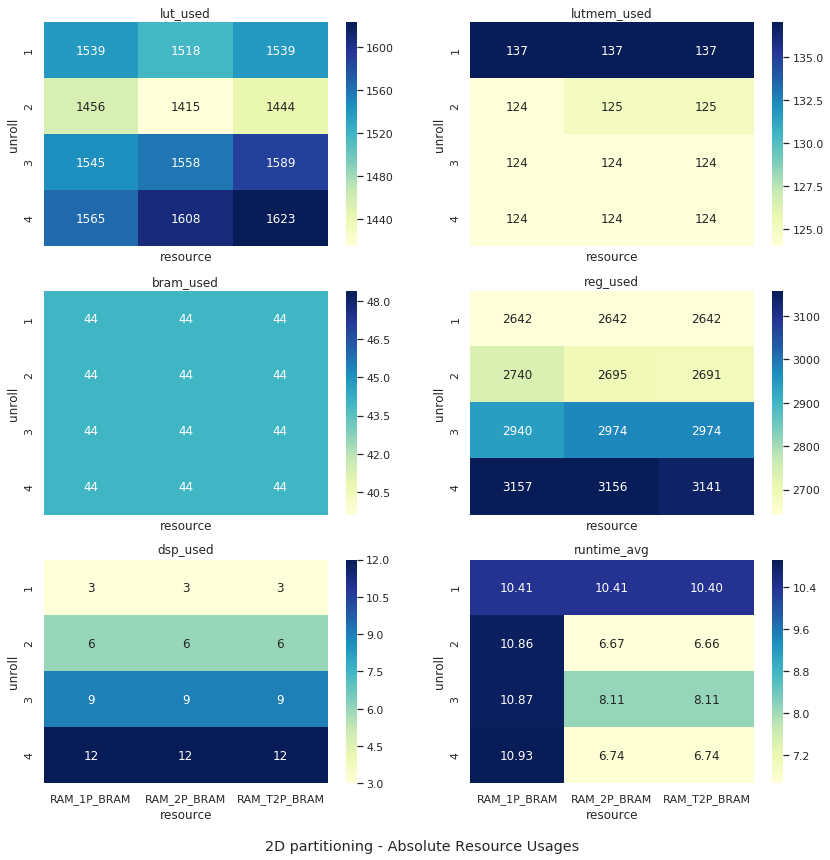

In [8]:
plt.figure()
sns.set()
sns.set_palette('muted')

# Configuration for subplot
cols = 2
rows = int(len(keys) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 14), sharex=True)

for idx, key in enumerate(keys):
    # Get current axes for the subplot
    ax = axes[int(idx / cols), idx % cols]
    pv = df.copy().pivot('unroll', 'resource', key)
    sns.heatmap(pv, ax=ax, cmap="YlGnBu", annot=True, fmt='.2f' if key=='runtime_avg' else '.0f')
    ax.title.set_text(key)
    
fig.suptitle('2D partitioning - Absolute Resource Usages', y=0.07)

In [9]:
fig.savefig('absolute.png', dpi=300)